## Preprocessing

In [26]:
# variables that are dropped
import pandas as pd
from helper_functions import format_variables, read_data

data_df = read_data()

to_filter = ["id", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# transform zeit variable to datetime keeping only the day, month and year:
data_df["zeit"] = pd.to_datetime(data_df["zeit"], format="%Y-%m-%d %H:%M:%S").dt.date
data_df

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,month,hour,day,age
0,2006-10-25,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,10,15,25,42
1,2006-08-28,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,8,17,28,53
2,2006-06-04,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,6,14,4,46
3,2006-10-13,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,10,14,13,34
4,2006-08-12,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,8,16,12,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,5,12,11,52
14827,2006-07-11,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,7,15,11,55
14828,2006-09-28,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,9,10,28,61
14829,2006-04-30,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,4,13,30,44


In [27]:
# Check the range of the variable zeit in the data_df:
print("The range of the variable zeit is from {} to {}".format(data_df["zeit"].min(), data_df["zeit"].max()))

The range of the variable zeit is from 2006-04-27 to 2006-11-06


In [28]:
# read csv data for the weather
weather_df = pd.read_csv("../Supplementary Datasets/Weather_data_Bruck_An_Der_Mur_2006_to_2007.csv", sep=",")

# rename the column datetime to zeit:
weather_df = weather_df.rename(columns={"datetime": "zeit"})
weather_df

,name,zeit,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Bruck an der Mur, Austria",2006-01-01,1.1,-6.9,-2.8,1.1,-6.9,-2.8,-3.6,94.6,...,NaN,NaN,NaN,2006-01-01T07:46:30,2006-01-01T16:18:32,0.05,"Snow, Overcast",Cloudy skies throughout the day with afternoon...,rain,"11170099999,11240099999,11175099999,1129209999..."
1,"Bruck an der Mur, Austria",2006-01-02,2.1,-2.4,0.8,2.1,-6.9,0.1,0.3,96.4,...,NaN,NaN,NaN,2006-01-02T07:46:29,2006-01-02T16:19:31,0.08,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,"11170099999,11180099999,11240099999,1117509999..."
2,"Bruck an der Mur, Austria",2006-01-03,4.1,-3.2,1.4,4.1,-8.9,0.6,0.2,92.3,...,NaN,NaN,NaN,2006-01-03T07:46:25,2006-01-03T16:20:31,0.12,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"11170099999,11180099999,11240099999,1117509999..."
3,"Bruck an der Mur, Austria",2006-01-04,2.1,-3.9,-0.1,2.1,-3.9,-0.2,-0.7,96.1,...,NaN,NaN,NaN,2006-01-04T07:46:19,2006-01-04T16:21:33,0.15,"Snow, Rain, Overcast",Cloudy skies throughout the day with morning r...,snow,"11170099999,11240099999,11175099999,1129209999..."
4,"Bruck an der Mur, Austria",2006-01-05,1.1,-1.5,0.3,1.1,-1.7,0.2,-0.1,97.3,...,NaN,NaN,NaN,2006-01-05T07:46:09,2006-01-05T16:22:38,0.19,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"11170099999,11240099999,11175099999,1129209999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Bruck an der Mur, Austria",2006-12-28,5.1,-6.9,-2.9,5.1,-6.9,-2.9,-4.5,90.2,...,NaN,NaN,NaN,2006-12-28T07:46:03,2006-12-28T16:14:52,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
362,"Bruck an der Mur, Austria",2006-12-29,6.6,-5.1,-0.9,6.6,-5.1,-1.2,-2.4,91.1,...,NaN,NaN,NaN,2006-12-29T07:46:14,2006-12-29T16:15:40,0.32,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
363,"Bruck an der Mur, Austria",2006-12-30,3.1,-5.9,-2.7,2.1,-5.9,-2.8,-3.9,92.3,...,NaN,NaN,NaN,2006-12-30T07:46:22,2006-12-30T16:16:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
364,"Bruck an der Mur, Austria",2006-12-31,2.4,-4.8,-2.0,2.4,-6.3,-2.1,-2.7,95.0,...,NaN,NaN,NaN,2006-12-31T07:46:28,2006-12-31T16:17:24,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."


In [29]:
# extract rows from april 2006 to december 2006 from weather_df:
weather_df = weather_df[weather_df["zeit"] >= "2006-04-27"]
weather_df = weather_df[weather_df["zeit"] <= "2006-11-06"]

# select only the temperature, zeit, name, tempmax, tempmin, humidity, pressure:
weather_df = weather_df[["zeit", "temp", "tempmax", "tempmin", "humidity"]]

weather_df

,zeit,temp,tempmax,tempmin,humidity
116,2006-04-27,13.3,16.1,10.3,90.1
117,2006-04-28,12.4,14.1,10.0,97.7
118,2006-04-29,10.7,12.1,6.5,92.4
119,2006-04-30,6.5,9.1,2.8,84.0
120,2006-05-01,9.8,16.1,2.3,76.3
...,...,...,...,...,...
305,2006-11-02,2.3,5.1,-0.9,53.2
306,2006-11-03,0.4,6.1,-2.9,77.9
307,2006-11-04,1.4,8.1,-2.4,82.2
308,2006-11-05,6.1,12.1,0.1,69.6


In [33]:
# transform zeit in weather_df and data_df to str:
weather_df["zeit"] = weather_df.zeit.astype(str)
data_df["zeit"] = data_df.zeit.astype(str)

# add the columns temp, tempmax, tempmin, humidity to the data_df on the same rows as the zeit:
merged_df = pd.merge(data_df, weather_df, on="zeit", how="left")
merged_df

,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,month,hour,day,age,temp,tempmax,tempmin,humidity
0,2006-10-25,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,10,15,25,42,13.0,18.1,8.8,91.9
1,2006-08-28,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,8,17,28,53,16.3,22.1,10.8,76.0
2,2006-06-04,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,6,14,4,46,13.9,19.1,8.1,55.9
3,2006-10-13,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,10,14,13,34,12.6,19.1,7.1,87.0
4,2006-08-12,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,8,16,12,40,12.1,13.1,10.5,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,5,12,11,52,14.4,20.1,5.8,50.4
14827,2006-07-11,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,7,15,11,55,23.4,31.1,14.2,69.4
14828,2006-09-28,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,9,10,28,61,15.4,23.1,10.1,79.7
14829,2006-04-30,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,4,13,30,44,6.5,9.1,2.8,84.0


## Descrptive Analysis on the weather data

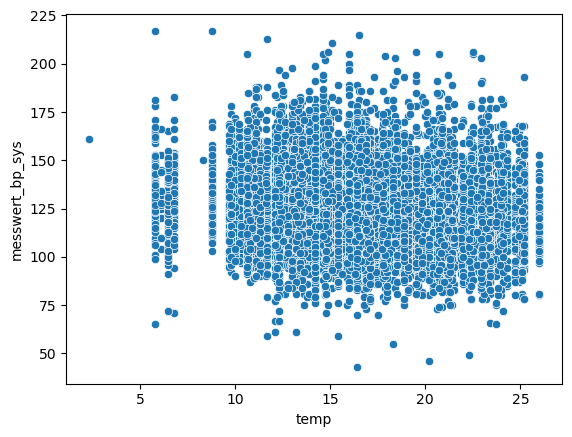

In [37]:
# Check if the temp variable affects the messwert_bp_sys:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="temp", y="messwert_bp_sys", data=merged_df)
plt.show()

In [38]:
# Check if there is a correlation between the temp and the messwert_bp_sys:
merged_df[["temp", "messwert_bp_sys"]].corr()

,temp,messwert_bp_sys
temp,1.000000,-0.105763
messwert_bp_sys,-0.105763,1.000000


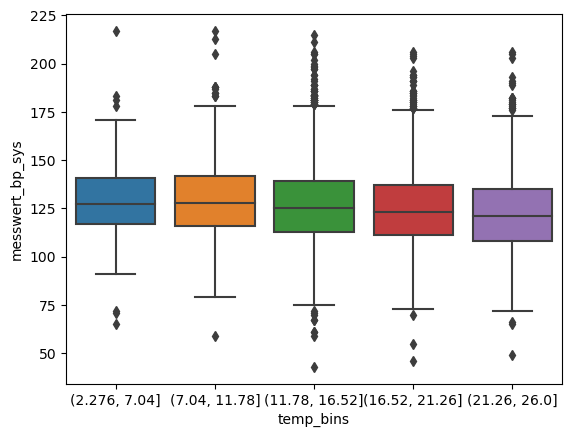

In [42]:
# separate the temp variable into bins and use boxplot:
merged_df["temp_bins"] = pd.cut(merged_df["temp"], bins=5)
sns.boxplot(x="temp_bins", y="messwert_bp_sys", data=merged_df)
plt.show()

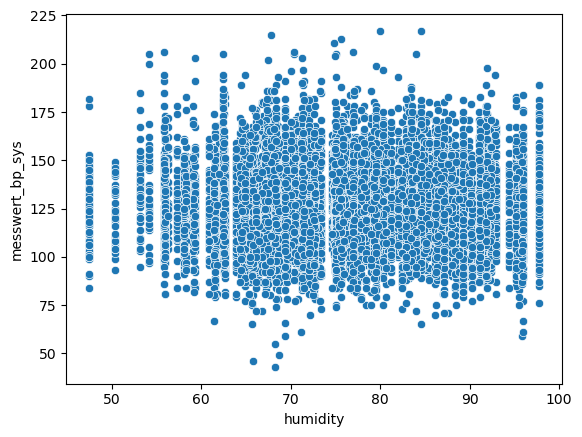

In [43]:
# Check if the humidity variable affects the messwert_bp_sys:
sns.scatterplot(x="humidity", y="messwert_bp_sys", data=merged_df)
plt.show()

In [44]:
# Check if there is a correlation between the humidity and the messwert_bp_sys:
merged_df[["humidity", "messwert_bp_sys"]].corr()

,humidity,messwert_bp_sys
humidity,1.000000,0.003922
messwert_bp_sys,0.003922,1.000000


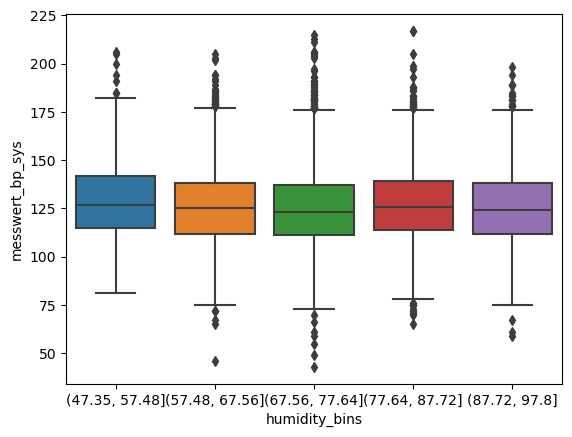

In [45]:
# separate the humidity variable into bins and use boxplot:
merged_df["humidity_bins"] = pd.cut(merged_df["humidity"], bins=5)
sns.boxplot(x="humidity_bins", y="messwert_bp_sys", data=merged_df)
plt.show()

In [ ]:
# fit a linear regression model to the measured blood pressure diastolic:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from helper_functions import separate_target, encode_data

# dummy code the categorical variables:
encoded_data = encode_data(data_df, cat_features, num_featurses)
encoded_train_set, encoded_test_set = train_test_split(encoded_data, test_size=0.3)

target = 'messwert_bp_dia'
x_train_dia, y_train_dia = separate_target(encoded_train_set, target)
x_test_dia, y_test_dia = separate_target(encoded_test_set, target)

x_train_sm_dia = sm.add_constant(x_train_dia)
x_test_sm_dia = sm.add_constant(x_test_dia)

model_dia = sm.OLS(y_train_dia, x_train_sm_dia.astype(float)).fit()

print(model_dia.summary())